### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
!pip install pytorch-tabnet
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.4 MB/s eta 0:00:00


In [2]:
# # Assuming your dataset is a CSV file named 'my_dataset.csv' in your 'My Drive/Colab Notebooks' folder
# df = pd.read_csv('//content/drive/MyDrive/Colab Notebooks/merged_v2.csv')

In [3]:
# # Install gdown if not already installed
# !pip install gdown

import gdown

# Google Drive file ID
file_id = "1hV5zbPSeM4IUtzQU9Bf7V7mB9176EGCi"

# Construct the download URL
download_url = f"https://drive.google.com/uc?id={file_id}"

# Download the file and save it locally
output_file = "data.csv"
gdown.download(download_url, output_file, quiet=False)

# Load the CSV file into a DataFrame
import pandas as pd
df1 = pd.read_csv(output_file)

# Display the first few rows
df1.head()


Downloading...
From: https://drive.google.com/uc?id=1hV5zbPSeM4IUtzQU9Bf7V7mB9176EGCi
To: /content/data.csv
100%|██████████| 333k/333k [00:00<00:00, 5.78MB/s]


,longitude,latitude,Area,Soil group,Land class,Soil type,pH,SOC,Nitrogen,Potassium,Phosphorus,Sulfur,Boron,Zinc,Sand,Silt,Clay
0,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,5.0,1.27,0.08,0.15,19.6,37.7,0.26,0.86,33.0,33.0,33.0
1,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,4.9,1.47,0.09,0.25,4.1,32.0,0.25,0.75,33.0,33.0,33.0
2,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,4.6,1.07,0.05,0.09,13.3,13.5,0.27,0.95,33.0,33.0,33.0
3,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,5.2,1.51,0.06,0.30,20.2,30.0,0.28,1.00,33.0,33.0,33.0
4,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,5.3,1.08,0.11,0.17,20.5,27.8,0.30,1.04,33.0,33.0,33.0


In [4]:
df1.tail()

,longitude,latitude,Area,Soil group,Land class,Soil type,pH,SOC,Nitrogen,Potassium,Phosphorus,Sulfur,Boron,Zinc,Sand,Silt,Clay
2579,5.40560,9.96670,isda,isda,isda,isda,6.10499,0.491113,0.031200,0.162866,3.39155,6.63695,0.009808,0.911567,66.0,19.0,14.0
2580,6.06999,9.47827,isda,isda,isda,isda,6.31601,0.405914,0.028539,0.143354,4.03134,5.75685,0.009814,0.882494,66.0,17.0,13.0
2581,8.65110,8.36451,isda,isda,isda,isda,5.86257,1.183850,0.062451,0.233885,2.53468,8.79315,0.009823,1.039760,70.0,20.0,15.0
2582,11.39654,9.14604,isda,isda,isda,isda,5.97490,0.335331,0.033715,0.124574,9.60043,5.34999,0.009902,0.858591,62.0,22.0,19.0
2583,8.63908,8.38572,isda,isda,isda,isda,6.22346,0.516436,0.021387,0.109438,4.22926,4.92892,0.009937,0.847897,70.0,18.0,14.0


### Exploring dataset

In [5]:
!pip install summarytools  # Install the summarytools library
from summarytools import dfSummary # Import the dfSummary function

dfSummary(df1)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.9 MB/s eta 0:00:00


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,longitude[float64],Mean (sd) : 23.0 (31.6)min < med < max:4.4 < 8.6 < 89.4IQR (CV) : 3.5 (0.7),"2,106 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtklEQVR4nO3ZTYqDQBCG4apBRDfdiOBhPEQOm0N4GwntIkog6dnNZpj8dDJkvuF9tlpFL14U0XPOBvx1H+8+AHCP6tYN7t6aWV24/5RzXgtngS9XQ3X3tu/7XQihK1m+LMvB3ffEimfdeqLWIYRuHMc1xrg9sjil1EzT1M3zXJsZoeIpN1/9ZmYxxm0YhmPB/rZgBviGjylIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIqN59APwf7t6aWV04fso5rz9dJFS8hLu3fd/vQghdyfyyLAd33/8UK6HiVeoQQjeO4xpj3B4ZTCk10zR18zzXZkao+H0xxm0YhmPBaHvtIh9TkECokECokECokECokECokECokECokECokECokECokHDXv/6UUvPo4pRScz6fKzML7v7wwSAnXC6XqrSVW/d8Ahi8Tn3OQr98AAAAAElFTkSuQmCC"">",0(0.0%)
2,latitude[float64],Mean (sd) : 12.7 (6.2)min < med < max:8.0 < 10.0 < 25.9IQR (CV) : 1.9 (2.0),"2,095 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACIUlEQVR4nO3dQY7aMBiG4d8NUANVAqIDu2zZzYIlh+hhewi23AMpjIJIwxCFdNOpKlUaiIeofOr7rLFh8YrIWNiuaRoDHt2nf/0BgFv0rr3AOTc0s0Hg/OemacrAscBv74bqnBvOZrNvcRxPQyY/HA4vzrnvxIqPuvaNOojjeLper8skSU5tJs7z3G82m2mWZQMzI1R8yNVHv5lZkiSn+Xz+I2D+YcAY4C8spiCBUCGBUCGBUCGBUCGBUCHhpp+nQtV13Tez2DkXOgU7WzCzDkMtiqJfVdVzmqZRFEWtNgvesLOFN52Fej6fe9770Wq1Oi0Wi5e249nZwp86ffSbmY3H49BdLTN2tvALiylIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRI6PykFPw/urzqiVBxF11f9USouJdOr3oiVNxVV1c9sZiCBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFhIf+u3Rd130zi51zIcPfPXkDWh421KIo+lVVPadpGkVR1OpAA7PrJ29Ay02h5nnu2058PB69mVlRFH63243ajt/v91+896Plcukmk8lrm7FlWX7ebrdPWZZ9dc4d2r43gsSXy6UX0sotY34CATKf0NYKYRQAAAAASUVORK5CYII="">",0(0.0%)
3,Area[object],1. isda2. Mithpukur3. Pirgacha 4. Taraganj Thana5. Kaunia upazila6. Gangachara,"2,107 (81.5%)186 (7.2%)125 (4.8%)79 (3.1%)65 (2.5%)22 (0.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAACKCAYAAAC96ziyAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACoUlEQVR4nO3dQW7TUABF0R8UIZg4iiJ1MV0Ei2UR2U1V1QNATMIAGKA2QMG+RuWcDThSb39qy0/dXS6XAYVXW38A/h9iIyM2MmIjsxtjvB1jvN76g5D7fLlcPpYX3J9Op3fTNB3Li7K9eZ7vd7vd+zK4/TRNx9vb24+Hw+FTdVG29fDw8OZ8Ph/v7u5ejzG62MYY43A4fLq5uflQXZR/wtv6gm4QyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyOzH+PrKydYfhM5WP+/9PM/35/P5ODZ45YTtzPN8P8b4XF7Ta+H/r/y18J2RMpXnnmz5bwMvx7MGL1uMJHg5fnvwstVIgpfjuYMXd6z8MQ91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzG+vqyyw+FvPWldtscjh5bBBIGNdReZXJ5uTjMX8dF1lTcWSrq6rrKlY2q/WVdZULMZDXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3N1XWVNxdJ+uq6ypmJJNghkrKvIXDvZnGgs7sl1lVUVa3i0rrKqYi3X1lVWVSzOQ10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyjwYvhi6s5cnBi6ELa/BaOBmDFzJuEMg89TXqK5RVPFpXWVaxlh/WVZZVrOmpdZVlFatwg0BGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbmh3WVZRVrerSusqxiLV4LJ2NdReb7yTacZqxtfzqd3o0xhpELa3s1TdPx27rq2r+BhEV4zkZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZPbf1lRjWFSxMhsEMtZVZPzNRkZsZMRG5gvKwCPIWEd8/AAAAABJRU5ErkJggg=="">",0(0.0%)
4,Soil group[object],1. isda2. Gangachara3. Kaunia4. Palashbari5. Berries6. Alluvial soil of Teesta7. the moon8. belab9. Sahapur10. Noadda11. other,"2,107 (81.5%)206 (8.0%)55 (2.1%)37 (1.4%)31 (1.2%)22 (0.9%)18 (0.7%)17 (0.7%)16 (0.6%)14 (0.5%)61 (2.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEOUlEQVR4nO3dQW4TZwCG4T+WRclmLMtSjsEBfAgOyyF8AO4RRZ4FTtmkizoo7S6Ueacyz7NBsJmReJnEo/8Ldy8vLwMKm7VvgN+H2MiIjYzYyIiNjNjIiI2M2MiIjczdGO

In [6]:
df1.columns

Index(['longitude', 'latitude', 'Area', 'Soil group', 'Land class',
       'Soil type', 'pH', 'SOC', 'Nitrogen', 'Potassium', 'Phosphorus',
       'Sulfur', 'Boron', 'Zinc', 'Sand', 'Silt', 'Clay'],
      dtype='object')

In [7]:
# Drop categorical columns, this is due to the isda data not having the classes relevant to the iPAGE data
df1 = df1.drop(['longitude', 'latitude', 'Area', 'Soil group', 'Land class', 'Soil type'], axis=1)
df1.head()

,pH,SOC,Nitrogen,Potassium,Phosphorus,Sulfur,Boron,Zinc,Sand,Silt,Clay
0,5.0,1.27,0.08,0.15,19.6,37.7,0.26,0.86,33.0,33.0,33.0
1,4.9,1.47,0.09,0.25,4.1,32.0,0.25,0.75,33.0,33.0,33.0
2,4.6,1.07,0.05,0.09,13.3,13.5,0.27,0.95,33.0,33.0,33.0
3,5.2,1.51,0.06,0.30,20.2,30.0,0.28,1.00,33.0,33.0,33.0
4,5.3,1.08,0.11,0.17,20.5,27.8,0.30,1.04,33.0,33.0,33.0


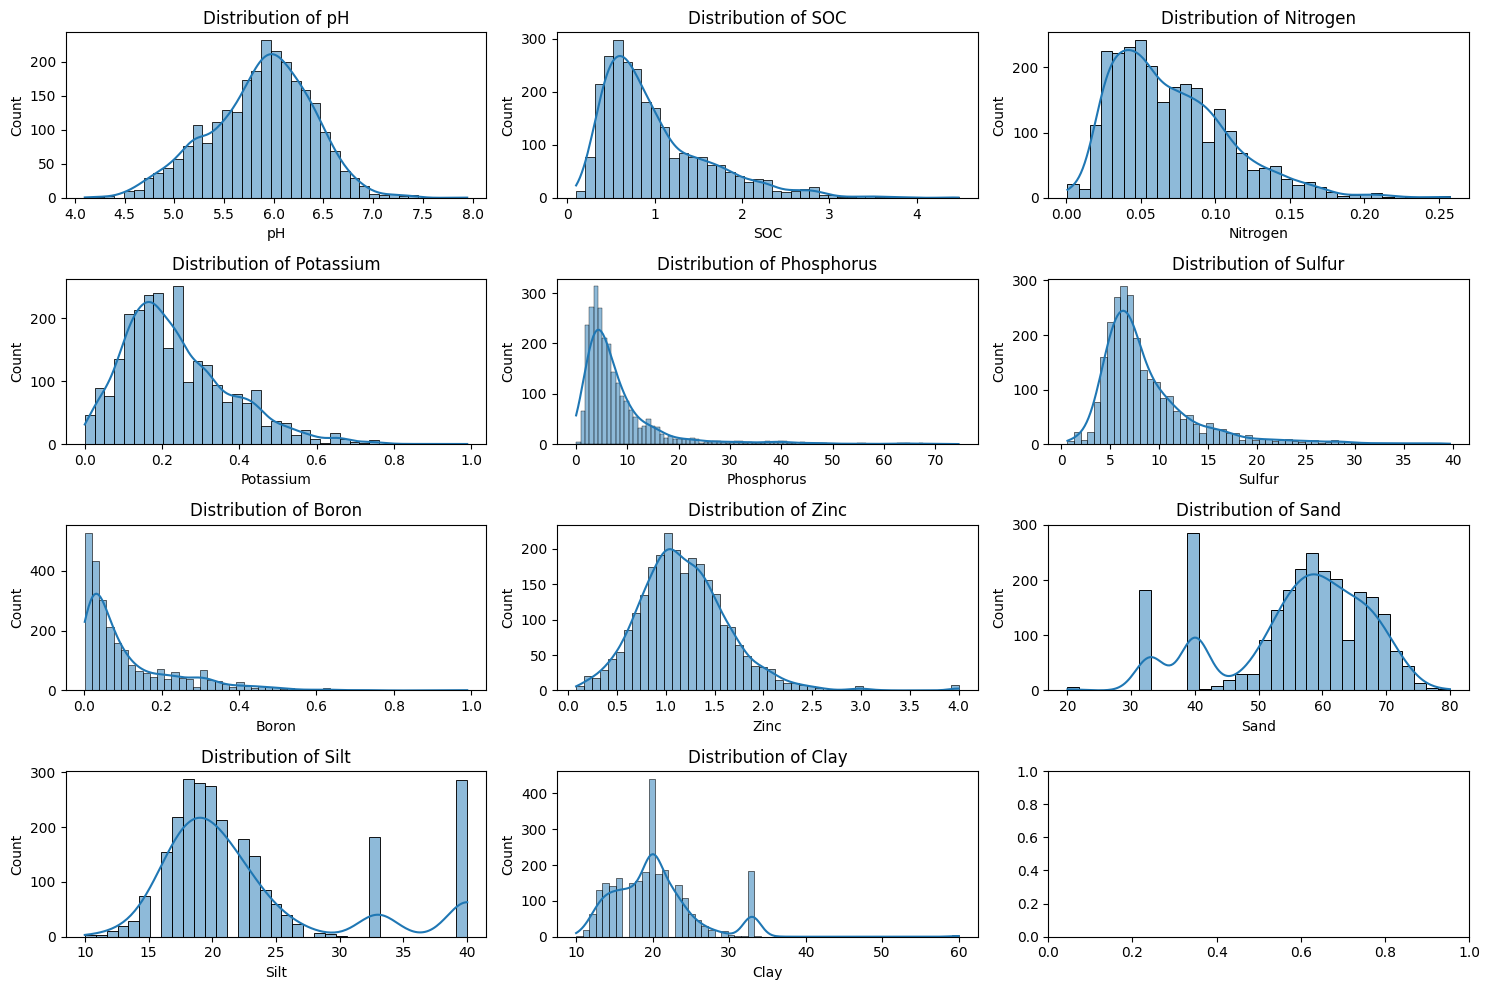

In [8]:
# Create subplots for each column
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Iterate through each column and plot its distribution
for i, column in enumerate(df1.columns):
    sns.histplot(data=df1, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

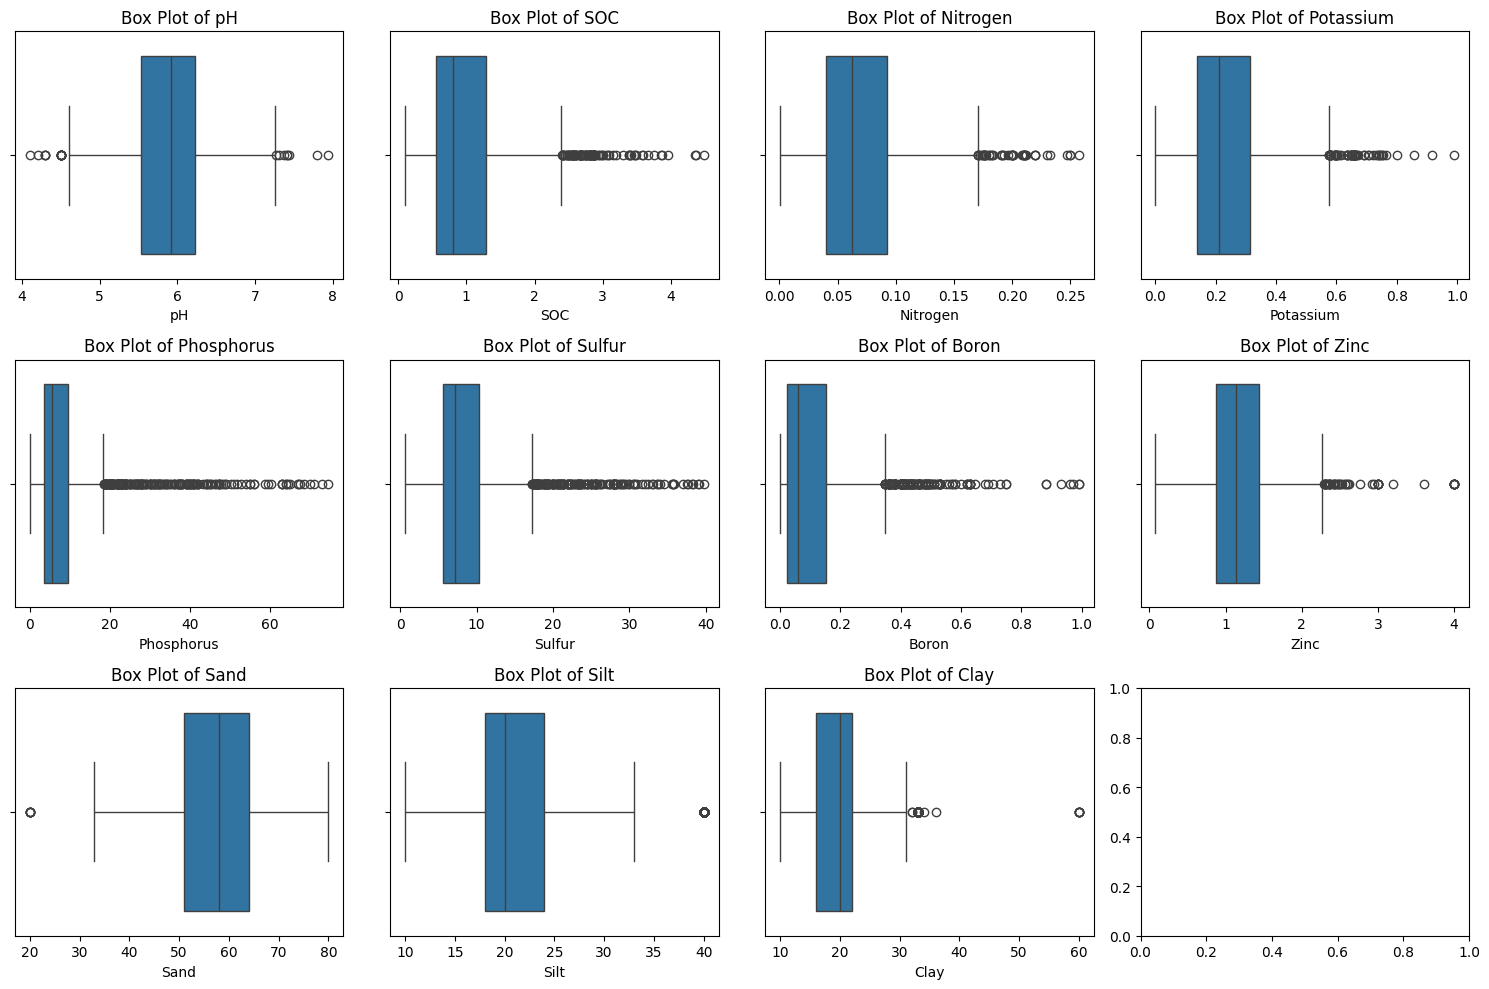

In [9]:
# Create subplots for each column
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()

# Plot box plots for each column
for i, column in enumerate(df1.columns):
    sns.boxplot(x=df1[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [10]:
df1.isnull().values.any()

False

In [11]:
df1.duplicated().any()

False

In [12]:
# Separate features and targets
targets = ['SOC', 'Boron', 'Zinc']
X = df1.drop(columns=targets)
y = df1[targets]

### Preprocessing

In [13]:
# Numerical Columns
numerical_cols = X.columns.tolist()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("yeo_johnson", PowerTransformer(method="yeo-johnson")),  # Yeo-Johnson Transformation
            ("scaler", StandardScaler())                        # Standard Scaling
        ]), numerical_cols)
    ]
)

# Fit the Preprocessor
pipeline = Pipeline(steps=[("preprocessor", preprocessor)])
pipeline.fit(X_train)

# Transform the Data
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Convert back to DataFrame for visualization
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=numerical_cols)



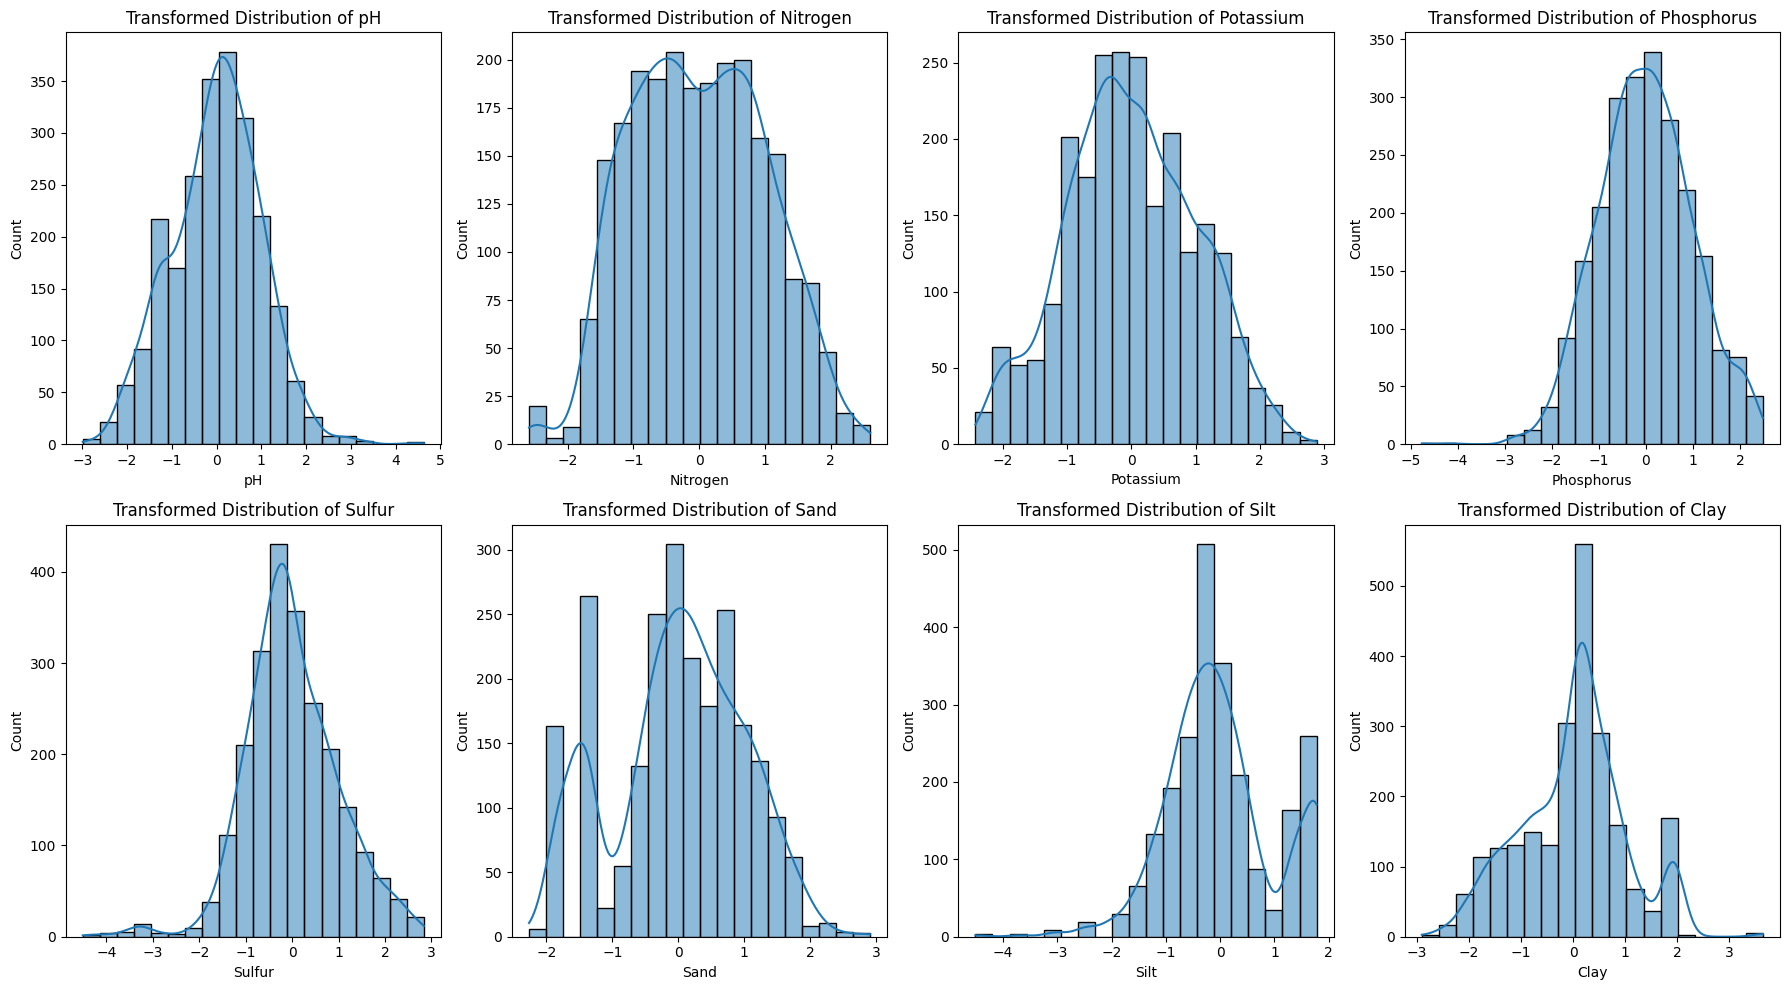

In [14]:
# Plot the Transformed Distributions
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(X_train_transformed_df.columns):
    sns.histplot(X_train_transformed_df[col], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f"Transformed Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

### Trying and evaluating various Models

In [15]:
# Models to evaluate
models = [
    ("Linear Regression", MultiOutputRegressor(LinearRegression())),
    ("XGBRegressor", MultiOutputRegressor(XGBRegressor())),
    ("TabNet", TabNetRegressor(verbose=0))  # PyTorch TabNet
]

# Evaluate models
results = []
for name, model in models:
    print(f"Training {name}...")

    if name == "TabNet":
        # TabNet-specific training
        # Reset index of y_train and y_test before fitting TabNet
        y_train_reset = y_train.reset_index(drop=True)
        y_test_reset = y_test.reset_index(drop=True)

        model.fit(
            X_train_transformed, y_train_reset.values,  # Pass NumPy array to TabNet
            eval_set=[(X_test_transformed, y_test_reset.values)],
            patience=10,
            max_epochs=100,
            batch_size=1024
        )
        predictions = model.predict(X_test_transformed)
    else:
        # Scikit-learn style models
        model.fit(X_train_transformed, y_train)
        predictions = model.predict(X_test_transformed)

    # Evaluate performance
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    results.append((name, mse, r2, rmse, mae))
    print(f"{name}: MSE = {mse:.4f}, R2 = {r2:.4f}, RMSE = {rmse:.4f}, MAE = {mae:.4f}")

# Display results
print("\nModel Performance Summary:")
for name, mse, r2, rmse, mae in results:
    print(f"{name}: MSE = {mse:.4f}, R2 = {r2:.4f}, RMSE = {rmse:.4f}, MAE = {mae:.4f}")

Training Linear Regression...
Linear Regression: MSE = 0.0925, R2 = 0.5044, RMSE = 0.3041, MAE = 0.1976
Training XGBRegressor...
XGBRegressor: MSE = 0.0747, R2 = 0.6016, RMSE = 0.2733, MAE = 0.1723
Training TabNet...

Early stopping occurred at epoch 31 with best_epoch = 21 and best_val_0_mse = 0.09064
TabNet: MSE = 0.0906, R2 = 0.4241, RMSE = 0.3011, MAE = 0.1990

Model Performance Summary:
Linear Regression: MSE = 0.0925, R2 = 0.5044, RMSE = 0.3041, MAE = 0.1976
XGBRegressor: MSE = 0.0747, R2 = 0.6016, RMSE = 0.2733, MAE = 0.1723
TabNet: MSE = 0.0906, R2 = 0.4241, RMSE = 0.3011, MAE = 0.1990


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [16]:
# Models to evaluate
models = [
    ("Linear Regression", MultiOutputRegressor(LinearRegression())),  # Ordinary Linear Regression
    ("Ridge Regression", MultiOutputRegressor(Ridge(alpha=10.0))),  # Regularized Linear Regression with tuned alpha
    ("XGBRegressor", MultiOutputRegressor(XGBRegressor(
        n_estimators=200, max_depth=6, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8))),
    ("TabNet", TabNetRegressor(verbose=0, n_d=16, n_a=16, gamma=1.5, n_steps=5, lambda_sparse=0.0001))
]

# Evaluate models
results = []
for name, model in models:
    print(f"Training {name}...")

    if name == "TabNet":
        # TabNet-specific training
        y_train_reset = y_train.reset_index(drop=True)
        y_test_reset = y_test.reset_index(drop=True)

        model.fit(
            X_train_transformed, y_train_reset.values,  # Pass NumPy array to TabNet
            eval_set=[(X_test_transformed, y_test_reset.values)],
            patience=20,
            max_epochs=200,
            batch_size=512,
            virtual_batch_size=128  # Smaller batch size for stability
        )
        predictions = model.predict(X_test_transformed)
    elif name in ["Linear Regression", "Ridge Regression"]:
        # Cross-validation for linear models
        from sklearn.model_selection import cross_val_predict

        # Get predictions for the test set using the fitted model
        model.fit(X_train_transformed, y_train)  # Fit the model on the training data
        predictions = model.predict(X_test_transformed) # Predict on the test data

    else:
        # Scikit-learn style models
        model.fit(X_train_transformed, y_train)
        predictions = model.predict(X_test_transformed)

    # Evaluate performance
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    results.append((name, mse, r2, rmse, mae))
    print(f"{name}: MSE = {mse:.4f}, R2 = {r2:.4f}, RMSE = {rmse:.4f}, MAE = {mae:.4f}")

# Display results
print("\nModel Performance Summary:")
for name, mse, r2, rmse, mae in results:
    print(f"{name}: MSE = {mse:.4f}, R2 = {r2:.4f}, RMSE = {rmse:.4f}, MAE = {mae:.4f}")

Training Linear Regression...
Linear Regression: MSE = 0.0925, R2 = 0.5044, RMSE = 0.3041, MAE = 0.1976
Training Ridge Regression...
Ridge Regression: MSE = 0.0925, R2 = 0.5042, RMSE = 0.3041, MAE = 0.1976
Training XGBRegressor...
XGBRegressor: MSE = 0.0654, R2 = 0.6419, RMSE = 0.2557, MAE = 0.1590
Training TabNet...

Early stopping occurred at epoch 58 with best_epoch = 38 and best_val_0_mse = 0.0733


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


TabNet: MSE = 0.0733, R2 = 0.5321, RMSE = 0.2707, MAE = 0.1846

Model Performance Summary:
Linear Regression: MSE = 0.0925, R2 = 0.5044, RMSE = 0.3041, MAE = 0.1976
Ridge Regression: MSE = 0.0925, R2 = 0.5042, RMSE = 0.3041, MAE = 0.1976
XGBRegressor: MSE = 0.0654, R2 = 0.6419, RMSE = 0.2557, MAE = 0.1590
TabNet: MSE = 0.0733, R2 = 0.5321, RMSE = 0.2707, MAE = 0.1846


### Hyperparameter Tuning using Randomized Search CV

In [17]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures
import warnings

In [18]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Define scoring metrics (R²)
scorer = make_scorer(r2_score)

# Define models and hyperparameter grids
model_configs = [
    {
        "name": "Linear Regression (Polynomial)",
        "model": MultiOutputRegressor(LinearRegression()),
        "param_grid": {"polynomial__degree": [1, 2, 3]},  # Degrees for Polynomial Features
        "use_poly": True,
    },
    {
        "name": "Ridge Regression",
        "model": MultiOutputRegressor(Ridge()),
        "param_grid": {"estimator__alpha": [0.1, 1.0, 10.0, 100.0]},
        "use_poly": False,
    },
    {
        "name": "XGBRegressor",
        "model": MultiOutputRegressor(XGBRegressor()),
        "param_grid": {
            "estimator__n_estimators": [100, 200, 300],
            "estimator__max_depth": [3, 6, 9],
            "estimator__learning_rate": [0.01, 0.05, 0.1],
            "estimator__subsample": [0.6, 0.8, 1.0],
            "estimator__colsample_bytree": [0.6, 0.8, 1.0],
        },
        "use_poly": False,
    },
    {
        "name": "TabNet",
        "model": TabNetRegressor(verbose=0),
        "param_grid": {
            "n_d": [8, 16, 32],
            "n_a": [8, 16, 32],
            "gamma": [1.0, 1.5, 2.0],
            "n_steps": [3, 5, 7],
        },
        "use_poly": False,
    },
]


In [19]:
# Add the import statement
import torch
from torch.utils.data import DataLoader, Dataset

In [22]:
# Prepare cross-validation setup
cv = KFold(n_splits=20, shuffle=True, random_state=42)

# Initialize results container
results = []

# Convert data to NumPy arrays (TabNet expects NumPy, not Pandas DataFrame)
X_train_np = X_train_transformed  # Already transformed as NumPy array
y_train_np = y_train.values  # Convert target to NumPy
X_test_np = X_test_transformed



In [23]:
for config in model_configs:
    print(f"\nOptimizing {config['name']}...")

    model = config["model"]
    param_grid = config["param_grid"]

    if config["use_poly"]:
        # Use pipeline for polynomial features
        pipeline = Pipeline([
            ("polynomial", PolynomialFeatures(include_bias=False)),
            ("scaler", StandardScaler()),  # Optional scaling
            ("model", model),
        ])
    else:
        pipeline = model

    if config["name"] == "TabNet":
        # Use NumPy arrays explicitly for TabNet
        random_search = RandomizedSearchCV(
            estimator=config["model"],
            param_distributions=param_grid,
            scoring=scorer,
            n_iter=10,
            cv=cv,
            verbose=1,
            n_jobs=-1,
            random_state=42,
            refit=True,
        )

        # Fit TabNet on NumPy data
        random_search.fit(X_train_np, y_train_np)

        # Update the best model
        best_model = random_search.best_estimator_

    else:
        # RandomizedSearchCV for other models
        random_search = RandomizedSearchCV(
            pipeline,
            param_distributions=param_grid,
            scoring=scorer,
            n_iter=10,
            cv=cv,
            verbose=1,
            n_jobs=-1,
            random_state=42,
            refit=True,
        )

        # Fit other models on the DataFrame
        random_search.fit(X_train, y_train)

        # Update the best model
        best_model = random_search.best_estimator_

    # Final evaluation using cross-validation (handle TabNet separately)
    if config["name"] == "TabNet":
        cv_scores = cross_val_score(best_model, X_train_np, y_train_np, scoring=scorer, cv=cv)
    else:
        cv_scores = cross_val_score(best_model, X_train, y_train, scoring=scorer, cv=cv)

    # Compute metrics
    cv_mse = -np.mean(cv_scores)
    cv_rmse = np.sqrt(cv_mse)

    # Test set evaluation
    best_model.fit(X_train_np if config["name"] == "TabNet" else X_train, y_train_np if config["name"] == "TabNet" else y_train)
    predictions = best_model.predict(X_test_np if config["name"] == "TabNet" else X_test)
    test_mse = mean_squared_error(y_test, predictions)
    test_r2 = r2_score(y_test, predictions)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, predictions)

    # Append results
    results.append({
        "Model": config["name"],
        "Best Params": random_search.best_params_,
        "CV MSE": cv_mse,
        "CV RMSE": cv_rmse,
        "Test MSE": test_mse,
        "Test R2": test_r2,
        "Test RMSE": test_rmse,
        "Test MAE": test_mae,
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nFinal Model Performance:")
print(results_df)



Optimizing Linear Regression (Polynomial)...
Fitting 20 folds for each of 3 candidates, totalling 60 fits

Optimizing Ridge Regression...
Fitting 20 folds for each of 4 candidates, totalling 80 fits

Optimizing XGBRegressor...
Fitting 20 folds for each of 10 candidates, totalling 200 fits

Optimizing TabNet...
Fitting 20 folds for each of 10 candidates, totalling 200 fits

Final Model Performance:
                            Model  \
0  Linear Regression (Polynomial)   
1                Ridge Regression   
2                    XGBRegressor   
3                          TabNet   

                                         Best Params    CV MSE  CV RMSE  \
0                          {'polynomial__degree': 2} -0.601561      NaN   
1                          {'estimator__alpha': 0.1} -0.540907      NaN   
2  {'estimator__subsample': 1.0, 'estimator__n_es... -0.627153      NaN   
3   {'n_steps': 3, 'n_d': 8, 'n_a': 8, 'gamma': 1.0} -0.569597      NaN   

   Test MSE   Test R2  Test RMSE  Te

In [26]:
# Sort results based on "Test R2"
results_df = results_df.sort_values("Test R2", ascending=False)
best_model_name = results_df.iloc[0]["Model"]
print(f"\nBest Model: {best_model_name}")

# Get the corresponding best model object and pipeline
for config in model_configs:
    if config["name"] == best_model_name:
        best_model = config['model'] # Get model from original config
        # Create a pipeline if necessary
        pipeline = Pipeline([
            ("polynomial", PolynomialFeatures(include_bias=False)),
            ("scaler", StandardScaler()),  # Optional scaling
            ("model", best_model),
        ]) if config["use_poly"] else best_model
        break  # Stop once model is found


# Determine if the best model is TabNet or others
if best_model_name == "TabNet":
    # TabNet requires NumPy arrays
    top_20_rows = X_test_np[:20]  # Ensure top 20 rows are in NumPy format
    # Fit the model on NumPy array if it is TabNet
    pipeline.fit(X_train_np, y_train_np)

else:
    # Use the pipeline to transform the top 20 rows of X_test
    top_20_rows = X_test.head(20)
    # Use the correct pipeline with transform
    top_20_transformed = pipeline.transform(top_20_rows) if hasattr(pipeline, 'transform') else top_20_rows

    # Fit the model on DataFrame if it's not TabNet
    pipeline.fit(X_train, y_train)

# Predict on the top 20 rows (use pipeline if necessary)
predictions = pipeline.predict(top_20_rows if best_model_name == "TabNet" else top_20_rows)


Best Model: XGBRegressor


In [35]:
# --- Display the predictions and compare with actual values ---
# Create a DataFrame to display the results
results_with_predictions = X_test.head(20).copy()  # Use the original DataFrame for input features

# Add the predicted values to the DataFrame, rounded to 5 decimal places
# If predictions are a multi-dimensional array, convert to a list of lists
if isinstance(predictions, np.ndarray) and predictions.ndim > 1:
    rounded_predictions = [[round(val, 5) for val in row] for row in predictions]
    results_with_predictions["Predicted Values"] = rounded_predictions
else:
    rounded_predictions = [round(val, 5) for val in predictions]
    results_with_predictions["Predicted Values"] = rounded_predictions

# Get the actual values for the top 20 rows from y_test
actual_values = y_test.head(20)

# Add the actual values to the DataFrame
results_with_predictions[["Actual SOC", "Actual Boron", "Actual Zinc"]] = actual_values

# Display the results
print("\nPredictions for Top 20 Rows (with Actual Values):")
print(results_with_predictions)


Predictions for Top 20 Rows (with Actual Values):
           pH  Nitrogen  Potassium  Phosphorus    Sulfur  Sand  Silt  Clay  \
2099  6.20480  0.054849   0.298815     3.46068   7.15273  56.0  23.0  18.0   
435   5.40000  0.100000   0.070000    12.00000  11.00000  33.0  33.0  33.0   
1729  6.04630  0.052378   0.386926     3.80197   7.23683  51.0  23.0  24.0   
321   6.10000  0.003500   0.520000    15.00000  18.00000  33.0  33.0  33.0   
2582  5.97490  0.033715   0.124574     9.60043   5.34999  62.0  22.0  19.0   
254   4.90000  0.080000   0.110000     6.60000  13.40000  40.0  40.0  20.0   
56    5.30000  0.110000   0.060000    12.20000  16.70000  40.0  40.0  20.0   
2018  5.97301  0.098155   0.333869     6.06139   9.13376  49.0  20.0  22.0   
393   5.80000  0.040000   0.410000    14.54000  27.95000  40.0  40.0  20.0   
2494  6.28284  0.023714   0.131806     3.71168   4.54323  73.0  18.0  11.0   
1499  5.98100  0.065011   0.300682     3.19071   7.47227  55.0  24.0  22.0   
1385  5.76413